In [1]:
from collections import defaultdict

from graphviz import Digraph
import matplotlib.pyplot as plt

In [46]:
class model_IEL() :
    def __init__(self, W=set(), D=set(), R=dict()) :
        self.W = W
        self.D = D
        self.R = R
        
class model_DEL() :
    def __init__(self, W=set(), R=defaultdict(lambda: set()), V=defaultdict(lambda: set())) :
        self.W = W
        self.R = R
        self.V = V
        
    def add_world(self, w) :
        self.W.add(w)
        self.R[w].add(w)
        
    def add_relation(self,w,v) :
        if w in self.W and v in self.W :
            self.R[w].add(v)
        else :
            print(f"{w} in W : {w in self.W}, \n{v} in W : {v in self.W}")
            
    def add_val(self,prop,w) :
        if w in self.W :
            self.V[prop].add(w)
            
    def true(self, formula, w) : 
        if formula.op == "prop" :
            return (w in V[formula.subform[0]])
        if formula.op == "AND" :
            return (self.true(formula.subform[0],w) and self.true(formula.subform[1],w))
        if formula.op == "NEG" : 
            return not self.true(formula.subform[0],w)
        if formula.op == "BOX" :
            return all(self.true(formula.subform[0],x) for x in self.R[w])
        if formula.op == "K" :
            return all(self.true(formula.subform[0],x) for x in self.W)
        if formula.op == "B" :
            return 
        
            
    def build_minimal_model(self, formula) :
        pass
    
    def diff(self, w, v) :
        return
    
    def draw(self, w = None) :
        g = Digraph()
        if w :
            return 
        else :
            for node in self.W :
                val = [p for p in self.V.keys() if node in self.V[p]]
                g.node(str(node), f"w{node}\n{val}")
                for target in self.R[node] :
                    g.edge(str(node),str(target))
            return g
    
    def __repr__(self) :
        return f"W : {self.W } \nR : {self.R.items()} \nV : {self.V.items()}"
    
    
class model_Inq_plaus() :
    def __init__(self, W=[], D=[], A=[], I=None, R = None, S = None) : 
        self._W = set(W)
        self._D = set(D)
        self._A = set(A)
        if not R :
            self._R = defaultdict(lambda:defaultdict(lambda: set()))
        else: 
            self._R = R
        self._I = I
        if not S :
            self._S = defaultdict(lambda:defaultdict(lambda: set()))
        else :
            self._S = S
        
    def add_world(self, w) :
        self._W.add(w)
        [self._R[i][w].add(w) for i in self._A]
        
    def add_element(self, d) :
        self._D.add(d)
        
    def add_agent(self, i) :
        self._A.add(i)
        [self._R[i][w].add(w) for w in self._W]
        
    def add_I(self, w, atom) :
        return
        
    def add_relation(self, i, w, v) :
        if w in self._W and v in self._W and i in self._A:
            self._R[i][w].add(v)
            # make sure remains transitive
            for u in self._R[i][v] :
                self._R[i][w].add(u)
            for u in self._R[i] :
                if w in self._R[i][u] :
                    self._R[i][u].add(v)
#             self.check_transitivity(w)
        else :
            print(f"{w} in W : {w in self._W}, \n{v} in W : {v in self._W}, \n{i} in A : {i in self._A}")
            
    def set_inq(self, i, s) :
        return
    
    def proposition(self, formula) :
        if formula.op == "atomic" :
            truth_set = set([w for w in self._W if formula.subform[0] in self._I[w]])
            #powerset
            return
        
    def support(self, s, formula) :
        if formula.op == "atomic" :
            return all(x in set([w for w in self._W if formula.subform[0] in self._I[w]]) for x in s)
            
            
    def draw(self, w = None, agents = None) :
        SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
#         SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
        if not agents :
            agents = self._A
        g = Digraph()
        if w :
            return 
        else :
            for node in self._W :
#                 val = [p for p in self.V.keys() if node in self.V[p]]
                g.node(str(node), f"w{node}".translate(SUB))
                g.edge(str(node), str(node))
                for i in agents :
                    for target in self._R[i][node] :
                        if target != node :
                            g.edge(str(node),str(target),label=f"a{i}".translate(SUB))
            return g
            
    

In [30]:
class formula() : 
    def __init__(self, op = None, subform = ()) :
        self.op = op
        self.subform = subform
        
    def from_string(self, string) :
        return 

In [31]:
M = model_DEL()

W : {1, 2, 3} 
R : dict_items([(1, {1, 2}), (2, {2, 3}), (3, {3})]) 
V : dict_items([('p', {2})])


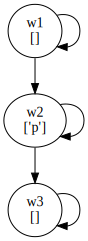

In [32]:
M.add_world(1)
M.add_world(2)
M.add_world(3)
M.add_val('p',2)
M.add_relation(1,2)
M.add_relation(2,3)
print(M)
M.draw()

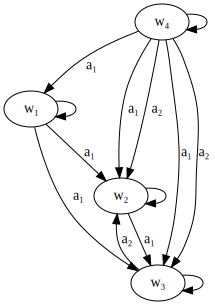

In [36]:
M1 = model_Inq_plaus()

M1.add_world(1)
M1.add_world(2)
M1.add_world(3)

M1.add_agent(1)
M1.add_agent(2)

M1.add_relation(1,1,2)
M1.add_relation(1,2,3)
M1.add_relation(2,3,2)

M1.add_world(4)
M1.add_relation(2,4,3)

M1.add_relation(1,4,2)
M1.add_relation(1,4,1)

M1.draw()

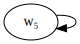

In [37]:
M2 = model_Inq_plaus()
M2.add_world(5)
M2.draw()

In [41]:
set([1,1,2])

{1, 2}

In [44]:
a = frozenset([1,2,3])
a.add(3)

AttributeError: 'frozenset' object has no attribute 'add'